<a href="https://colab.research.google.com/github/leikcaro/predicicon-ventas/blob/main/Proy1Parte5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression



Mounted at /content/drive


In [2]:
filename = '/content/drive/MyDrive/Coding Dojo/Proyecto 1 /sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Según lo anterior, podemos apreciar datos nulos en "Outlet_Size" e Item_Weight".

In [4]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [5]:
def Upgrade_Item_Identifier_mean(Item_Identifier):
  Item_Identifier_filter  = df['Item_Identifier'] == Item_Identifier
  values_mean = df[Item_Identifier_filter]['Item_Weight'].mean()
  return values_mean

In [6]:
Item_Weight_filter_isna = df['Item_Weight'].isna()

df.loc[Item_Weight_filter_isna , 'Item_Weight'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['Item_Identifier']) ,axis=1 )
df[Item_Weight_filter_isna] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
#ocuparemos el metodo fillna para rellenar datos faltantes de en item weight, ya que es un dato numérico y no queremos perder 
#valiosa información de las otras columnas, haremos una imputacion usando el valor promedio


In [8]:
#revisamos si efectivamente se imputaron los valores correctamente en todas las filas con datos faltantes en Item Weight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
item_weight_nan=df.loc[:,'Item_Weight'].isna()
item_weight_nan.value_counts()

False    8519
True        4
Name: Item_Weight, dtype: int64

En el caso de Outlet Size, al ser la variable tipo string, podemos rellenar con el valor más frecuente, o sea la moda si no deseamos borrar el dato.
Creo que es importante no borrar el dato, ya que el tamaño de la tienda es menos relevante que toda la informacion del producto en si.







In [10]:
def Upgrade_Outlet_Size_Mode(Outlet_Size):
  Outlet_Size_Filter  = df['Outlet_Size'] == Outlet_Size
  values_mode = df[Outlet_Size_Filter]['Outlet_Size'].mode()
  return values_mode


In [11]:
Outlet_Size_Filter_isna = df['Outlet_Size'].isna()

df.loc[Outlet_Size_Filter_isna, 'Outlet_Size'] = df.apply(lambda x:Upgrade_Outlet_Size_Mode( x['Outlet_Size']) ,axis=1 )
df[Outlet_Size_Filter_isna] 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df=df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6109 non-null   object 
 1   Item_Weight                6109 non-null   float64
 2   Item_Fat_Content           6109 non-null   object 
 3   Item_Visibility            6109 non-null   float64
 4   Item_Type                  6109 non-null   object 
 5   Item_MRP                   6109 non-null   float64
 6   Outlet_Identifier          6109 non-null   object 
 7   Outlet_Establishment_Year  6109 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       6109 non-null   object 
 10  Outlet_Type                6109 non-null   object 
 11  Item_Outlet_Sales          6109 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.4+ KB


In [15]:
#Ya podemos empezar a analizar la información y generar datos estadísticos de ella.

In [16]:
#partiremos viendo los tipos de alimentos
df["Item_Type"].value_counts()

Fruits and Vegetables    883
Snack Foods              867
Household                649
Frozen Foods             614
Dairy                    495
Canned                   471
Baking Goods             462
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

In [17]:
#lo que más hay son frutas y vegetales, seguido de snacks
#ahora veremos los tipos de alimentos y su visibilidad promedio
df.groupby(["Item_Type"])["Item_Visibility"].mean()

Item_Type
Baking Goods             0.065236
Breads                   0.064715
Breakfast                0.082604
Canned                   0.065790
Dairy                    0.071806
Frozen Foods             0.064535
Fruits and Vegetables    0.066176
Hard Drinks              0.060607
Health and Hygiene       0.052946
Household                0.060014
Meat                     0.062537
Others                   0.057084
Seafood                  0.081590
Snack Foods              0.065964
Soft Drinks              0.063198
Starchy Foods            0.063735
Name: Item_Visibility, dtype: float64

se observa que la visibilidad de los alimentos en mayor cantidad no es tan alta como la de masas y otros, pero se ve claramente que los snacks, 
el segundo tipo con mayor cantidad de productos, esta muy abajo en la visibilidad.

In [18]:
df.Item_Fat_Content.value_counts()

Low Fat    3640
Regular    2073
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64

De lo anterior vemos que no hay altos en grasa, pero que tenemos un pequeño problema: LF debe corresponder a Low Fat al igual que low fat, lo mismo para reg y Regular. Esto es un error de tipeo por lo que vamos a arreglarlo para poder agrupar de mejor manera.

In [19]:
values2 = {"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}
df.Item_Fat_Content= df.Item_Fat_Content.replace(to_replace=values2)
df.Item_Fat_Content.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Low Fat    3954
Regular    2155
Name: Item_Fat_Content, dtype: int64

Revisaremos todas las columnas tipo object para revisar problemas de tipeo similares

In [20]:
df.Item_Type.value_counts()

Fruits and Vegetables    883
Snack Foods              867
Household                649
Frozen Foods             614
Dairy                    495
Canned                   471
Baking Goods             462
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

In [21]:
df.Outlet_Identifier.value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
OUT019    527
Name: Outlet_Identifier, dtype: int64

In [22]:
df.Outlet_Size.value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [23]:
df.Outlet_Location_Type.value_counts()

Tier 3    2792
Tier 1    2387
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [24]:
df.Outlet_Type.value_counts()

Supermarket Type1    3722
Supermarket Type3     932
Supermarket Type2     928
Grocery Store         527
Name: Outlet_Type, dtype: int64

No se observan errores de tipeo en otras columnas, por lo que seguimos con los datos estadísticos

In [25]:
#Algo no muy relevante pero para ir cerrando el analisis de los items es el peso promedio por tipo de aliemento, util para temas logísticos
df.groupby(["Item_Type"])["Item_Weight"].mean()

Item_Type
Baking Goods             12.334048
Breads                   11.162151
Breakfast                12.697025
Canned                   12.439331
Dairy                    13.422596
Frozen Foods             12.739674
Fruits and Vegetables    13.220221
Hard Drinks              11.519696
Health and Hygiene       13.114918
Household                13.772635
Meat                     12.700728
Others                   13.949675
Seafood                  13.089565
Snack Foods              13.044625
Soft Drinks              11.923574
Starchy Foods            13.929476
Name: Item_Weight, dtype: float64

Curiosamente casi todos los articulos pesan lo mismo en promedio! revisemos los minimos y maximos

In [26]:
df.groupby(["Item_Type"])["Item_Weight"].min()

Item_Type
Baking Goods             4.880
Breads                   4.635
Breakfast                6.425
Canned                   4.615
Dairy                    4.805
Frozen Foods             4.555
Fruits and Vegetables    5.460
Hard Drinks              4.610
Health and Hygiene       5.175
Household                5.030
Meat                     5.150
Others                   5.500
Seafood                  5.365
Snack Foods              5.095
Soft Drinks              4.590
Starchy Foods            6.695
Name: Item_Weight, dtype: float64

In [27]:
df.groupby(["Item_Type"])["Item_Weight"].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

Los pesos de los productos oscilan entre 4 y 21.5 aprox. 

In [28]:
#revisaremos los valores promedio por tipo de alimento

In [29]:
g2=df.groupby(["Item_Type"])["Item_MRP"].mean()
g2

Item_Type
Baking Goods             126.276381
Breads                   141.718544
Breakfast                135.161630
Canned                   139.428248
Dairy                    148.412065
Frozen Foods             138.983373
Fruits and Vegetables    145.374122
Hard Drinks              138.277699
Health and Hygiene       130.926909
Household                150.090504
Meat                     140.102582
Others                   132.948080
Seafood                  141.694922
Snack Foods              146.678937
Soft Drinks              130.669381
Starchy Foods            150.851307
Name: Item_MRP, dtype: float64

In [30]:
df.groupby(["Item_Type"])["Item_MRP"].min()

Item_Type
Baking Goods             33.9874
Breads                   31.9558
Breakfast                40.0480
Canned                   36.3506
Dairy                    33.4874
Frozen Foods             31.9558
Fruits and Vegetables    36.2506
Hard Drinks              34.2532
Health and Hygiene       33.1216
Household                32.4558
Meat                     34.7532
Others                   35.0190
Seafood                  33.7216
Snack Foods              32.3558
Soft Drinks              31.2900
Starchy Foods            34.3532
Name: Item_MRP, dtype: float64

In [31]:
df.groupby(["Item_Type"])["Item_MRP"].max()

Item_Type
Baking Goods             265.5568
Breads                   263.6594
Breakfast                232.7326
Canned                   266.8884
Dairy                    266.1884
Frozen Foods             264.8910
Fruits and Vegetables    263.9252
Hard Drinks              261.4278
Health and Hygiene       266.6884
Household                263.9910
Meat                     260.2936
Others                   254.9040
Seafood                  240.2880
Snack Foods              264.9568
Soft Drinks              263.3910
Starchy Foods            263.0252
Name: Item_MRP, dtype: float64

Es muy curioso que los valores y pesos sean tan similares para tipos de item tan diferentes!

In [32]:
#Ahora veremos como se distribuyen los items para venta en diferentes PDV, veremos que items son los mas vendidos:

In [33]:
  gr1=df.groupby(by=["Item_Type","Outlet_Type"])["Outlet_Type"].count()
  gr1

Item_Type      Outlet_Type      
Baking Goods   Grocery Store         42
               Supermarket Type1    283
               Supermarket Type2     68
               Supermarket Type3     69
Breads         Grocery Store         16
                                   ... 
Soft Drinks    Supermarket Type3     45
Starchy Foods  Grocery Store          4
               Supermarket Type1     70
               Supermarket Type2     17
               Supermarket Type3     14
Name: Outlet_Type, Length: 64, dtype: int64

Otra información relevante son las ventas por PDV para cada item, identificando los mejores PDV por categoria de item

In [34]:
  df.groupby(by=["Item_Type","Outlet_Identifier"])["Item_MRP"].sum()
  baking_grocery=df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Grocery Store")]['Outlet_Type'].count()
  baking_super1= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type1")]['Outlet_Type'].count()
  baking_super2= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type2")]['Outlet_Type'].count()
  baking_super3= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type3")]['Outlet_Type'].count()
  baking_list=[baking_grocery, baking_super1, baking_super2, baking_super3]

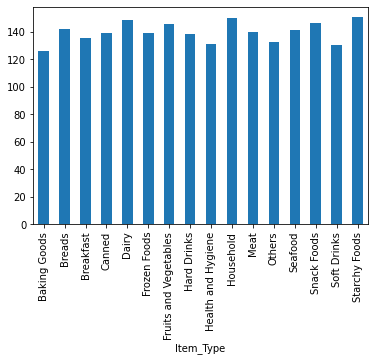

In [35]:
g2.plot.bar()

([<matplotlib.patches.Wedge at 0x7fed03b38390>,
 [Text(1.0554422683381766, 0.30990582150899426, 'Groc_Store'),
  Text(-0.8783490399698465, 0.6621955632470283, 'SuperT1'),
  Text(0.18610030349051676, -1.0841432917473306, 'SuperT2'),
  Text(0.9811239450485454, -0.49738898706382617, 'SuperT3')])

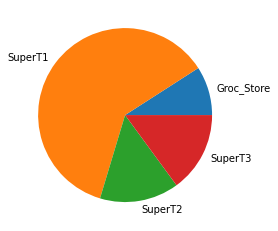

In [36]:
import matplotlib.pyplot as plt
baking_names= ['Groc_Store', 'SuperT1', 'SuperT2', 'SuperT3']
plt.pie(baking_list, labels=baking_names)
#en este grafico podemos ver, para la categoria de baking goods, como se distribuyen las ventas, siendo los super t1 quienes mas venden este tipo de producto


In [37]:
import seaborn as sns

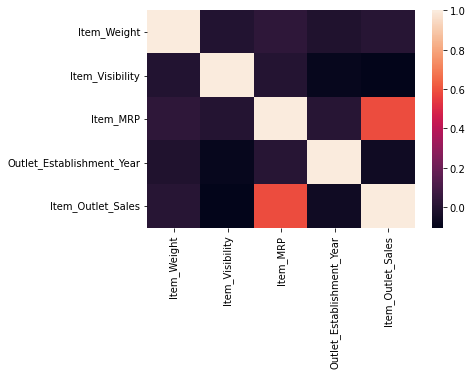

In [38]:
#Este grafico muestra todos los datos numericos y sus correlaciones, donde podemos ver que solo se destaca una correlacion moderada en el caso de Item_MRP y Item _Outlet_Sales
#Esto se debe a que a mayor valor de los productos, mayores son las ventas del retail, por lo que si el retailer vende productos caros, gana mas (no necesariamente margina más)
sns.heatmap(df.corr())

In [39]:
#Seria interesante ver un hitograma de variables relevantes, como Item_MRP y Item Outlet Sales

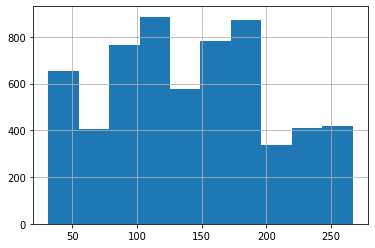

In [40]:
df["Item_MRP"].hist() #Los precios se distribuyen de manera homogenea, excepto que de 200 en adelante hay menos productos que en el resto de los precios

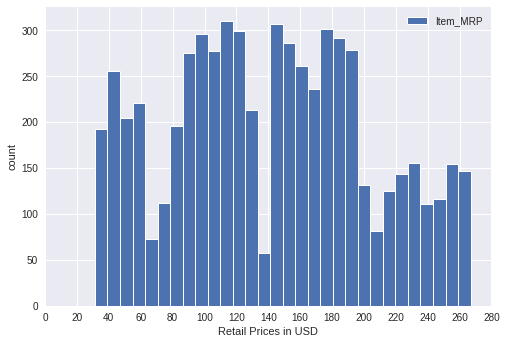

In [41]:
#dado que queremos tener mas control de como se presenta esta información para mejorar nuestro analisis, usaremos Matplotlib para poder detallar algunos puntos del gráfico
plt.style.use('seaborn')

Item_MRP=np.array(df["Item_MRP"])
plt.hist(Item_MRP, label='Item_MRP', stacked=True, edgecolor='white', lw=1, bins=30)
plt.xlabel('Retail Prices in USD')
plt.xticks(np.arange(0, 300, step=20))
plt.ylabel('count')
plt.legend()


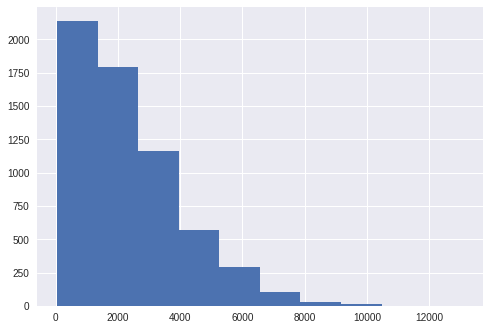

In [42]:
df["Item_Outlet_Sales"].hist() #Los precios se distribuyen de manera homogenea, excepto que de 200 en adelante hay menos productos que en el resto de los precios

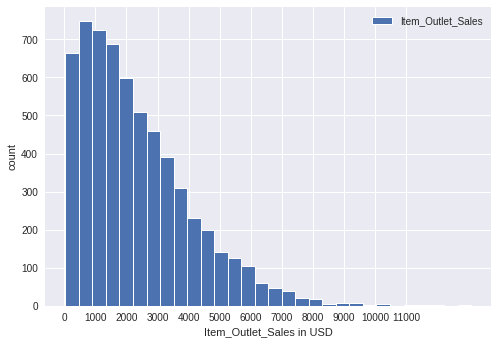

In [43]:
#Lo mismo en el caso de Item Outles Sales
Item_MRP=np.array(df["Item_Outlet_Sales"])
plt.hist(Item_MRP, label='Item_Outlet_Sales', stacked=True, edgecolor='white', lw=1, bins=30)
plt.xlabel('Item_Outlet_Sales in USD')
plt.xticks(np.arange(0, 12000, step=1000))
plt.ylabel('count')
plt.legend()

In [44]:
#de lo anterior podemos concluir que el grafico tiene un acento a la izquierda, y se distribuje de manera muy uniforme, donde la mayor cantidad de locales vende menos de 3500 

#ahora veremos algunos gráficos tipo box para poder entender mejor 

In [45]:
#Los minoristas piden que diseñemos un modelo que ayude a predecir ventas en los PDV, y para ello desarrollaremos en primera instancia, dos modelos sencillos,
#evaluando si tienen buenos resultados predictivos: linear regression y KNN
#Previo a dicho analisis revisaremos los tipos de datos, ya que para hacer regresion lineal necesitamos datos numericos o categóricos
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6109 non-null   object 
 1   Item_Weight                6109 non-null   float64
 2   Item_Fat_Content           6109 non-null   object 
 3   Item_Visibility            6109 non-null   float64
 4   Item_Type                  6109 non-null   object 
 5   Item_MRP                   6109 non-null   float64
 6   Outlet_Identifier          6109 non-null   object 
 7   Outlet_Establishment_Year  6109 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       6109 non-null   object 
 10  Outlet_Type                6109 non-null   object 
 11  Item_Outlet_Sales          6109 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.4+ KB


In [46]:
#Analisis de los features
#0. item ideintifier, no nos agrega valor esta columna al analisis por lo que lo eliminaremos para realizar linear regression:
df=df.drop("Item_Identifier", axis=1)
#las columnas 2, 4, 6, 8, 9 y 10 pueden ser transformada en categorias, por lo que la dejaremos para hacer one hot encoding

In [47]:
df['Item_Fat_Content'].value_counts()

Low Fat    3954
Regular    2155
Name: Item_Fat_Content, dtype: int64

In [48]:
# al solo haber dos tipos, dejaremos low fat como 0 y regular como 1, ya que además low fat y regular fat son ordinales
gen_ord_map = {'Low Fat': 0, 'Regular': 1}
df['Item_Fat_Content_n'] = df['Item_Fat_Content'].map(gen_ord_map)
df=df.drop(["Item_Fat_Content"], axis=1)
df['Item_Fat_Content_n'][0:4]

0    0
1    1
2    0
4    0
Name: Item_Fat_Content_n, dtype: int64

In [49]:
#revisaremos item_type
df['Item_Type'].value_counts() #tenemos diferentes clasificaciones no ordinales por lo que quedan asi para que el one hot encoding las transforme

Fruits and Vegetables    883
Snack Foods              867
Household                649
Frozen Foods             614
Dairy                    495
Canned                   471
Baking Goods             462
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

In [50]:
df['Outlet_Identifier'].value_counts() #lo mismo pasa en este caso

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
OUT019    527
Name: Outlet_Identifier, dtype: int64

In [51]:
df['Outlet_Location_Type'].value_counts() #en esta columna si es posible cambiar los datos por val nominales
values4 = {"Tier 1": 1, "Tier 2": 2, "Tier 3": 3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(values4)
df['Outlet_Location_Type'].value_counts()

3    2792
1    2387
2     930
Name: Outlet_Location_Type, dtype: int64

In [52]:
df['Outlet_Type'].value_counts() #Se aprecia un orden en donde grocery es le mas bajo y despues 3 tipos de supermercado, por lo que haremos lo mismo usanod grocery como 0
values5 = {"Grocery Store": 0,"Supermarket Type1": 1, "Supermarket Type2": 2, "Supermarket Type3": 3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(values5)
df['Outlet_Location_Type'].value_counts()

3    2792
1    2387
2     930
Name: Outlet_Location_Type, dtype: int64

In [53]:
pip install --upgrade category_encoders


     |████████████████████████████████| 80 kB 4.8 MB/s 


In [54]:
from sklearn.model_selection import train_test_split
import category_encoders as ce #esta biblioteca tiene mejores encoders que scikitlearn 
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True) 
df_ohe= ohe.fit_transform(df)
df_ohe.head()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Item_Weight,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store,Item_Outlet_Sales,Item_Fat_Content_n
0,9.300,0.016047,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,3735.1380,0
1,5.920,0.019278,0,1,0,0,0,0,0,0,...,1,0,0,3,0,1,0,0,443.4228,1
2,17.500,0.016760,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,2097.2700,0
4,8.930,0.000000,0,0,0,1,0,0,0,0,...,0,1,0,3,1,0,0,0,994.7052,0
5,10.395,0.000000,0,0,0,0,1,0,0,0,...,1,0,0,3,0,1,0,0,556.6088,1


In [55]:
#Examinaremos las características de los features que nos brindan información cuantitativa sobre cada punto de datos. 
#La columna "Item_Outlet_Sales", será la variable que buscamos predecir.
 
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X_ohe=df_ohe.drop("Item_Outlet_Sales", axis=1)
X_ohe.shape

(6109, 36)

In [56]:
y=df_ohe["Item_Outlet_Sales"].values
y.shape

(6109,)

In [57]:
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y, test_size=0.3, random_state=42)

In [58]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

In [59]:
reg.fit(X_ohe_train,y_ohe_train)

LinearRegression()

In [60]:
reg.predict(X_ohe_train[0:10])


array([1654.58529776, 1525.46415974,  941.56328105, 3588.53389979,
       4121.12206949, 2028.25152131, 3852.26973662,  886.03112643,
       3240.44661843,  825.42742173])

In [61]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [62]:
reg.predict(X_ohe_test[0:10])

array([2750.40151174, 3017.66390744, 1802.66977703, 4021.05570126,
        434.15673459, 4438.32292727, 2915.52048248, 2646.77606336,
        898.11065711, 2794.49374777])

In [63]:
score = reg.score(X_ohe_test, y_ohe_test)


In [64]:
score

0.5339649692704184

In [65]:
#nuestra regresion lineal funciona mas o menos mal, de todos modos, revisaremos cuales son los features mas relevantes:
reg.coef_

array([  -2.70825486,  -58.38481189,  -77.74953597,    5.09040585,
         -5.88456997,  -65.46713783,   20.56887325,  -15.74852038,
        -20.51231549,  338.46963968,  -34.13689474,  -82.55385559,
        -39.05275179,  -51.05442076,  -49.50115148,   47.05115914,
       -112.48700049,  142.96807656,   16.43795894,   53.70935093,
       -315.6538826 , -175.55957817,  554.84479878,  323.60673901,
        173.20348474, -614.15091268,   -0.73434771,  292.9002671 ,
       -175.55957817, -117.34068894,  300.46616076,  374.95999651,
       -315.6538826 ,  554.84479878, -614.15091268,   12.39082671])

In [66]:
#se aprecia que los coeficientes 23 y 35 son los mas altamente influyentes, mientras que 24 y 18 los que influyen negativamente. 
reg.coef_

array([  -2.70825486,  -58.38481189,  -77.74953597,    5.09040585,
         -5.88456997,  -65.46713783,   20.56887325,  -15.74852038,
        -20.51231549,  338.46963968,  -34.13689474,  -82.55385559,
        -39.05275179,  -51.05442076,  -49.50115148,   47.05115914,
       -112.48700049,  142.96807656,   16.43795894,   53.70935093,
       -315.6538826 , -175.55957817,  554.84479878,  323.60673901,
        173.20348474, -614.15091268,   -0.73434771,  292.9002671 ,
       -175.55957817, -117.34068894,  300.46616076,  374.95999651,
       -315.6538826 ,  554.84479878, -614.15091268,   12.39082671])

In [67]:
reg.coef_[0]

-2.708254859708854

In [68]:
#df_ohe contiene las 37 columnas feaures y la target, por lo que podemos crear un diccionario para asociar cada una de las columnas con las respuestas
df_cols={}
for i in range(36):
  
  #print(df_ohe.columns[i])
  df_cols[df_ohe.columns[i]]= reg.coef_[i]
print(df_cols)

{'Item_Weight': -2.708254859708854, 'Item_Visibility': -58.38481189091654, 'Item_Type_Dairy': -77.74953597280054, 'Item_Type_Soft Drinks': 5.090405846147308, 'Item_Type_Meat': -5.884569966512297, 'Item_Type_Household': -65.46713782758633, 'Item_Type_Baking Goods': 20.568873247279033, 'Item_Type_Snack Foods': -15.748520378141826, 'Item_Type_Fruits and Vegetables': -20.51231548715037, 'Item_Type_Breakfast': 338.4696396802984, 'Item_Type_Health and Hygiene': -34.136894737072744, 'Item_Type_Hard Drinks': -82.55385558994188, 'Item_Type_Frozen Foods': -39.052751790001516, 'Item_Type_Canned': -51.05442075624418, 'Item_Type_Starchy Foods': -49.501151484916626, 'Item_Type_Breads': 47.05115913725522, 'Item_Type_Others': -112.48700048561057, 'Item_Type_Seafood': 142.96807656499524, 'Item_MRP': 16.43795894343878, 'Outlet_Identifier_OUT049': 53.70935092997883, 'Outlet_Identifier_OUT018': -315.6538826033516, 'Outlet_Identifier_OUT013': -175.55957816535377, 'Outlet_Identifier_OUT027': 554.84479877790

In [69]:
#probemos ahora con KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [70]:
X_ohe.shape

(6109, 36)

In [71]:
y.shape

(6109,)

In [72]:
scaler = StandardScaler()
# Ajusta en X_ohe (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X_ohe)
# Transform X
X_ohe = scaler.transform(X_ohe);
scaler3= StandardScaler()
scaler3.fit(y.reshape(-1, 1))
y= scaler3.transform(y.reshape(-1, 1));
y

array([[ 0.81108252],
       [-1.0790832 ],
       [-0.12941256],
       ...,
       [-0.64859643],
       [-0.27392765],
       [-0.8940427 ]])

In [73]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

In [74]:
X_ohe[0]


array([-0.77421011, -0.96725846,  3.36770161, -0.23199341, -0.23081565,
       -0.34476727, -0.28603033, -0.4066877 , -0.41105094, -0.1144603 ,
       -0.25281419, -0.15756919, -0.33427226, -0.28903332, -0.13224349,
       -0.17373974, -0.14334554, -0.0871034 ,  1.74380549,  2.35983415,
       -0.42322098, -0.42429594, -0.42429594, -0.42375859, -0.42375859,
       -0.30726309,  0.36180879,  1.09069049, -0.42429594, -0.80082574,
       -1.16109681,  0.80082574, -0.42322098, -0.42429594, -0.30726309,
       -0.73825314])

In [75]:
rmse_val=[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_ohe_train, y_ohe_train)  #fit the model
    pred=model.predict(X_ohe_test) #make prediction on test set
    error = mean_squared_error(y_ohe_test,pred)**(1/2) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('Score for k= ' , K , 'is:', model.score(X_ohe_test, y_ohe_test))
    print('RMSE value for k= ' , K , 'is:', error)

Score for k=  1 is: 0.17718151839625074
RMSE value for k=  1 is: 1572.5307106337063
Score for k=  2 is: 0.3475155391019491
RMSE value for k=  2 is: 1400.3358372881803
Score for k=  3 is: 0.38714249595927264
RMSE value for k=  3 is: 1357.1469368373741
Score for k=  4 is: 0.4217056602585
RMSE value for k=  4 is: 1318.3222668434807
Score for k=  5 is: 0.4230434330301326
RMSE value for k=  5 is: 1316.7965414131875
Score for k=  6 is: 0.4348335654054015
RMSE value for k=  6 is: 1303.2726976020929
Score for k=  7 is: 0.43830229530322096
RMSE value for k=  7 is: 1299.2670998216042
Score for k=  8 is: 0.433668900667055
RMSE value for k=  8 is: 1304.6148638012066
Score for k=  9 is: 0.42642929185347256
RMSE value for k=  9 is: 1312.9270581235987
Score for k=  10 is: 0.4240309752829817
RMSE value for k=  10 is: 1315.669117595456
Score for k=  11 is: 0.41572754608849494
RMSE value for k=  11 is: 1325.11882132032
Score for k=  12 is: 0.4152947406991113
RMSE value for k=  12 is: 1325.609527662101
S

In [76]:
#como podemos apreciar en lo anterior, tenemos otro modelo que predice aprox con un 50% de exactitud los valores y en este caso el RMSE para el mejor valor de k es de 1174.3425617442492

#¿Cómo podemos mejorar los resultados de nuestros modelos?
#una de las maneras fue iterando los resultados y cambiando los valores de k, otra manera es eliminar columnas que no son relevantes... 
#elegir cuales son estas columnas no es facil, pero podemos ver cuales no son relevantes viendo los pesos que el modelo les da a las variables



In [77]:
#anteriormente habiamos generado una lista con los features que afectaban poco los resultados de nuestro modelo de regresion lineal, por lo que 
#ocuparemos dichos valores para elegir qué features usaremos para filtrar nuestro modelo, para ello creo que una buena solucion es descartar los features
#cuyo valor absoluto es un outlayer, para ello primero graficaremos usando histograma, los valores del diccionario de resultados de la regresion lineal

In [78]:
good_cols={}
for key, value in df_cols.items():
  if value > abs(35):
    print("el valor a guardar sera: ", value)
    good_cols[key]=value
good_cols

el valor a guardar sera:  338.4696396802984
el valor a guardar sera:  47.05115913725522
el valor a guardar sera:  142.96807656499524
el valor a guardar sera:  53.70935092997883
el valor a guardar sera:  554.8447987779044
el valor a guardar sera:  323.60673900687584
el valor a guardar sera:  173.2034847370362
el valor a guardar sera:  292.90026710452975
el valor a guardar sera:  300.46616075543614
el valor a guardar sera:  374.9599965085352
el valor a guardar sera:  554.8447987779043


{'Item_Type_Breads': 47.05115913725522,
 'Item_Type_Breakfast': 338.4696396802984,
 'Item_Type_Seafood': 142.96807656499524,
 'Outlet_Identifier_OUT027': 554.8447987779044,
 'Outlet_Identifier_OUT035': 173.2034847370362,
 'Outlet_Identifier_OUT046': 323.60673900687584,
 'Outlet_Identifier_OUT049': 53.70935092997883,
 'Outlet_Location_Type': 300.46616075543614,
 'Outlet_Size_Medium': 292.90026710452975,
 'Outlet_Type_Supermarket Type1': 374.9599965085352,
 'Outlet_Type_Supermarket Type3': 554.8447987779043}

In [79]:
gc=[*good_cols] #acceder a los indices del dict y transformarlos a lista
gc

['Item_Type_Breakfast',
 'Item_Type_Breads',
 'Item_Type_Seafood',
 'Outlet_Identifier_OUT049',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT035',
 'Outlet_Size_Medium',
 'Outlet_Location_Type',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type3']

In [80]:
new_df=df_ohe.loc[:,gc]
new_df_arr=new_df.values
scaler2 = StandardScaler()
# Ajusta en X_ohe (asumiendo que tu matriz de características es una matriz NumPy)


In [81]:
scaler2.fit(new_df_arr)
# Transform X
new_df_arr = scaler2.transform(new_df_arr);
new_df_arr

array([[-0.1144603 , -0.17373974, -0.0871034 , ..., -1.16109681,
         0.80082574, -0.42429594],
       [-0.1144603 , -0.17373974, -0.0871034 , ...,  1.01671725,
        -1.24871111, -0.42429594],
       [-0.1144603 , -0.17373974, -0.0871034 , ..., -1.16109681,
         0.80082574, -0.42429594],
       ...,
       [-0.1144603 , -0.17373974, -0.0871034 , ..., -0.07218978,
         0.80082574, -0.42429594],
       [-0.1144603 , -0.17373974, -0.0871034 , ...,  1.01671725,
        -1.24871111, -0.42429594],
       [-0.1144603 , -0.17373974, -0.0871034 , ..., -1.16109681,
         0.80082574, -0.42429594]])

In [82]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_df_arr, y, test_size=0.3, random_state=42)


In [83]:
#usaremos la lista de variables que para la regresion eran relevantes para generar un modelo en KNN y evaluar si mejora:

rmse_val=[]
for K in range(20):
    K = K+1 #solo para q no parta con neighbors=0
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K)

    model2.fit(X_new_train, y_new_train)  #fit the model
    pred=model2.predict(X_new_test) #make prediction on test set
    error = mean_squared_error(y_new_test,pred)**(1/2) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('Score for k= ' , K , 'is:', model2.score(X_new_test, y_new_test))
    print('RMSE value for k= ' , K , 'is:', error)

Score for k=  1 is: -0.3477514951965903
RMSE value for k=  1 is: 1.1556588706995508
Score for k=  2 is: -0.1160666078583894
RMSE value for k=  2 is: 1.0516465545433034
Score for k=  3 is: 0.03815147231498994
RMSE value for k=  3 is: 0.9762883082470751
Score for k=  4 is: 0.03191195424890414
RMSE value for k=  4 is: 0.979449783917837
Score for k=  5 is: -0.01941385124648165
RMSE value for k=  5 is: 1.0050785654311742
Score for k=  6 is: 0.06231752599190521
RMSE value for k=  6 is: 0.9639458667302024
Score for k=  7 is: 0.06897231836076523
RMSE value for k=  7 is: 0.960519183385201
Score for k=  8 is: 0.09142302837454286
RMSE value for k=  8 is: 0.9488675807584936
Score for k=  9 is: 0.08847760839852159
RMSE value for k=  9 is: 0.9504043532198695
Score for k=  10 is: 0.1304090248276799
RMSE value for k=  10 is: 0.9282869775912397
Score for k=  11 is: 0.12840647976729946
RMSE value for k=  11 is: 0.929355219769553
Score for k=  12 is: 0.12168578164732025
RMSE value for k=  12 is: 0.932931

In [84]:
#el resultado anterior es muy malo, por lo que eliminando features sugeridos por la regresion lineal para aplicarlo al KNN en este caso no dio resultado
#en el caso de una nueva regresion lineal:



In [85]:
# Hacer una instancia de regresión lineal
reg2 = LinearRegression(fit_intercept=True)

In [86]:
reg2.fit(X_new_train, y_new_train)
reg2_pred = model2.predict(X_new_test)
reg2_pred

array([[-0.23493152],
       [ 0.07090143],
       [ 0.07090143],
       ...,
       [-0.36751838],
       [ 0.46350077],
       [-1.13125009]])

In [87]:
 error2 = mean_squared_error(y_new_test,reg2_pred)**(1/2)
 print("el error es: ",error2)
 print("el score es: ", reg2.score(X_new_test, y_new_test))

el error es:  0.9222196291716847
el score es:  0.18624686038875649


In [88]:
#por lo anterior, al parecer no nos está resultando eliminar features para mejorar los resultados!
#probaremos con otros tipos de modelos que puedan ser aplicables a este problema

In [89]:
#elegimos random forest porque es poco probable que arboles de desicion entregue mejores resultados. En caso de que no resulte un modelo interesante, probaremos con otros
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np



In [90]:
X_rf=df_ohe.drop("Item_Outlet_Sales", axis=1)
y_rf=df_ohe["Item_Outlet_Sales"]
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6109 non-null   float64
 1   Item_Visibility                  6109 non-null   float64
 2   Item_Type_Dairy                  6109 non-null   int64  
 3   Item_Type_Soft Drinks            6109 non-null   int64  
 4   Item_Type_Meat                   6109 non-null   int64  
 5   Item_Type_Household              6109 non-null   int64  
 6   Item_Type_Baking Goods           6109 non-null   int64  
 7   Item_Type_Snack Foods            6109 non-null   int64  
 8   Item_Type_Fruits and Vegetables  6109 non-null   int64  
 9   Item_Type_Breakfast              6109 non-null   int64  
 10  Item_Type_Health and Hygiene     6109 non-null   int64  
 11  Item_Type_Hard Drinks            6109 non-null   int64  
 12  Item_Type_Frozen Foo

In [91]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [92]:
rndf_clf = RandomForestRegressor(n_estimators=300)
rndf_clf.fit(X_rf_train, y_rf_train)
y_pred = rndf_clf.predict(X_rf_test)

print(y_pred)
print(y_rf_test)
rndf_clf.score(X_rf_test, y_rf_test)

[2405.10706867 3489.664198   1450.52963467 ... 1132.04864333 1832.66332533
  575.34663133]
1584    1099.9016
3528    3872.9586
6603     958.7520
2228     969.4048
3997     591.2304
          ...    
2437    6035.4770
3229    1813.6392
720      554.6114
8503    3392.9168
83       583.2408
Name: Item_Outlet_Sales, Length: 1833, dtype: float64


0.5237575423346126

In [93]:
#la capacidad predictiva del random forest supera a la de otros modelos pero aun no es suficientemente buena, revisaré si los valores son homogeneos y 
#diversos para ver si ese 58% es relevante

y_rf.value_counts(normalize=True, bins=8)

#probaremos modificando parámetros y eliminando columnas lo 

(20.901999999999997, 1665.582]    0.435259
(1665.582, 3297.208]              0.318383
(3297.208, 4928.834]              0.157800
(4928.834, 6560.46]               0.063513
(6560.46, 8192.086]               0.019152
(8192.086, 9823.713]              0.004583
(9823.713, 11455.339]             0.000982
(11455.339, 13086.965]            0.000327
Name: Item_Outlet_Sales, dtype: float64

In [94]:
grid = { 
    'n_estimators': [45,50,55,60,65,70,75],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [12,13,14,15]
}
forest_clf = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, grid, cv=4,
                          return_train_score=True)

grid_search.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [45, 50, 55, 60, 65, 70, 75]},
             return_train_score=True)

In [95]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.56813369 0.56917506 0.57109046 0.56780242 0.57132197 0.56409509
 0.56723356 0.55347151 0.5584761  0.55768966 0.55705922 0.56065837
 0.55936341 0.5593609  0.56554686 0.56573595 0.57296788 0.57099695
 0.57107813 0.57268714 0.57113705 0.56296704 0.55596102 0.56059727
 0.55872393 0.55526563 0.56187396 0.56366616 0.56887912 0.56773847
 0.56940831 0.57108426 0.57354065 0.57259295 0.5724927  0.55648957
 0.55938301 0.56439268 0.56058131 0.56749164 0.56618796 0.5644628
 0.56657089 0.57087492 0.56672649 0.57166026 0.57006653 0.56841368
 0.56837863 0.55882033 0.56428284 0.56089423 0.56312256 0.55902453
 0.5628235  0.5623338 ] [{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 45}, {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 50}, {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 55}, {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 60}, {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 65}, {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 

In [96]:
grid_search.best_params_
#dado que  los valores inicialmente nos dieron {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 15} con 0.56 estos son los mejores paramteros, buscaremos una alternativa de prediccion con una 
#aun mayor profundidad (dado que son grandes vol de datos), metodo sqrt y menores estimadores modificando los parametros anteriormente
#despues de varias pruebas con diferentes valores, se observa un patron, el metodo sqrt da mejores resultados constantemente que el gini, tambien se observa que el max depth llega a 13
#despues ya no mejora las estimaciones, ahi se observa que el numero de estimadores si está mejorando los resultados.

{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 65}

In [97]:
grid_search.best_score_

0.5735406450605295

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.08265417, 0.08259797, 0.00466175, 0.00397106, 0.00395114,
       0.00529733, 0.00427689, 0.00616196, 0.0055233 , 0.00387586,
       0.00374892, 0.00261992, 0.00456579, 0.00365649, 0.00274158,
       0.00310236, 0.00226192, 0.00208326, 0.46864928, 0.00130038,
       0.0078302 , 0.00152641, 0.03769267, 0.00459136, 0.00265963,
       0.05119734, 0.03674145, 0.00754439, 0.00107456, 0.00987914,
       0.01071334, 0.01698994, 0.00392741, 0.05190327, 0.04766777,
       0.0103598 ])

Observamos que la columna numero 18 es la que explica con mayor exactitud los valores para este grid search, con un importante 0,47% vs otras con 0.002% o incluso 0,001% de importancia
Esa columna es la del valor de los items, por lo que tiene total sentido para predecir los valores de venta, a mayor valor de los items mas vende el Outlet.
De todos modos, este ejercicio nos sirve para concluir que hay algunas columnas que podriamos eliminar para poder probar otro modelo sin columnas que agregan poco valor.

In [99]:
cols=[4,6,7,10,11,12,14,16,17,19,22,24,26,27]
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6109 non-null   float64
 1   Item_Visibility                  6109 non-null   float64
 2   Item_Type_Dairy                  6109 non-null   int64  
 3   Item_Type_Soft Drinks            6109 non-null   int64  
 4   Item_Type_Meat                   6109 non-null   int64  
 5   Item_Type_Household              6109 non-null   int64  
 6   Item_Type_Baking Goods           6109 non-null   int64  
 7   Item_Type_Snack Foods            6109 non-null   int64  
 8   Item_Type_Fruits and Vegetables  6109 non-null   int64  
 9   Item_Type_Breakfast              6109 non-null   int64  
 10  Item_Type_Health and Hygiene     6109 non-null   int64  
 11  Item_Type_Hard Drinks            6109 non-null   int64  
 12  Item_Type_Frozen Foo

In [102]:
X_dep.columns[cols]

Index(['Item_Type_Meat', 'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Frozen Foods', 'Item_Type_Starchy Foods', 'Item_Type_Others',
       'Item_Type_Seafood', 'Outlet_Identifier_OUT049',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Establishment_Year', 'Outlet_Size_Medium'],
      dtype='object')

In [103]:
#observamos que justamente las variables que creamos para hacer la regresion lineal y KNN usando one hot encoding son las que menos valor añaden al modelo y por lo tanto
#probaremos la opcion de hacer un random forest con la data original del DF, pero haciendo drop al item type y al  outlet identifier. en el caso 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6109 non-null   float64
 1   Item_Visibility            6109 non-null   float64
 2   Item_Type                  6109 non-null   object 
 3   Item_MRP                   6109 non-null   float64
 4   Outlet_Identifier          6109 non-null   object 
 5   Outlet_Establishment_Year  6109 non-null   int64  
 6   Outlet_Size                6109 non-null   object 
 7   Outlet_Location_Type       6109 non-null   int64  
 8   Outlet_Type                6109 non-null   object 
 9   Item_Outlet_Sales          6109 non-null   float64
 10  Item_Fat_Content_n         6109 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 572.7+ KB


In [104]:
df2=df.drop(["Item_Type","Outlet_Identifier"], axis=1)
#df2["Outlet_Type"].value_counts()
df2["Outlet_Type"]

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
4       Supermarket Type1
5       Supermarket Type2
              ...        
8517    Supermarket Type1
8518    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 6109, dtype: object

In [ ]:
#al parecer, no podemos mejorar de los 0.588 , con {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 75}, por lo que concluimos que, con los parametros actuales y la calidad de la informacion,
#nuestro predictor es poco eficiente, si mejoramos la calidad de la data o bien, cambiamos de modelo quizas podemos encontrar mejores soluciones, pero por ahora queda hasta aqui
